# Comparing Search Interest with Google Trends

In the mid 1990s, the First [Browser War](https://en.wikipedia.org/wiki/Browser_wars) began with Netscape Navigator and Microsoft Internet Explorer fighting for dominance. By 2001, Internet Explorer was the clear winner, but it was not long before the Second Browser Wars began (2004-2017). This coincided with the rise of smartphones, which emphasized the need and competitiveness for more mobile-friendly versions of browsers.

In this notebook, we'll analyze the worldwide popularity of browsers over time using Google Trends. Although this won't give us direct market share figures, we can use Google Trends to get a sense of interest of a given browser over time and how that interest compares to other browsers. In particular, we will be looking at five major players over the past two decades: Mozilla Firefox (2002-), Apple's Safari (2002-), Google Chrome (2008-), Microsoft Internet Explorer (1995-2020), and Opera (1995-).

### The Dataset

The dataset you will use was downloaded as a CSV from this Google Trends query in mid-October of 2020. This is a time series indexed by month with the search interest for each browser.

```datasets/worldwide_browser_trends.csv```

- **Month:** each month from 2004-01 to 2020-10
- **Firefox:** search interest for Firefox
- **Safari:** search interest for Safari
- **Google Chrome:** search interest for Chrome
- **Internet Explorer:** search interest for Internet Explorer
- **Opera:** search interest for Opera

Google defines the values of search interest as:

> Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

May the best browser win!

### 1. Imports

In [161]:
# Tools
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load Data

In [162]:
df = pd.read_csv('datasets/worldwide_browser_trends.csv', parse_dates=['Month'], index_col='Month')

browsers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              223 non-null    object
 1   Firefox            223 non-null    int64 
 2   Safari             223 non-null    int64 
 3   Google Chrome      223 non-null    int64 
 4   Internet Explorer  223 non-null    int64 
 5   Opera              223 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 10.6+ KB


In [163]:
df.describe()

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
count,223.000000,223.000000,223.000000,223.000000,223.000000
mean,34.327354,3.399103,23.654709,13.246637,9.919283
std,24.192462,1.307428,16.693368,9.773893,5.255005
min,4.000000,1.000000,1.000000,1.000000,3.000000
25%,9.000000,2.000000,7.000000,3.000000,5.000000
50%,32.000000,3.000000,23.000000,13.000000,10.000000
75%,57.000000,4.000000,41.000000,21.000000,14.000000
max,100.000000,8.000000,56.000000,36.000000,21.000000


## Rolling Average

The rolling average, or moving average, calculates trends over short periods of time using a subset of the data. It helps us to see trends that might otherwise be difficult to detect when looking at the data as a whole.

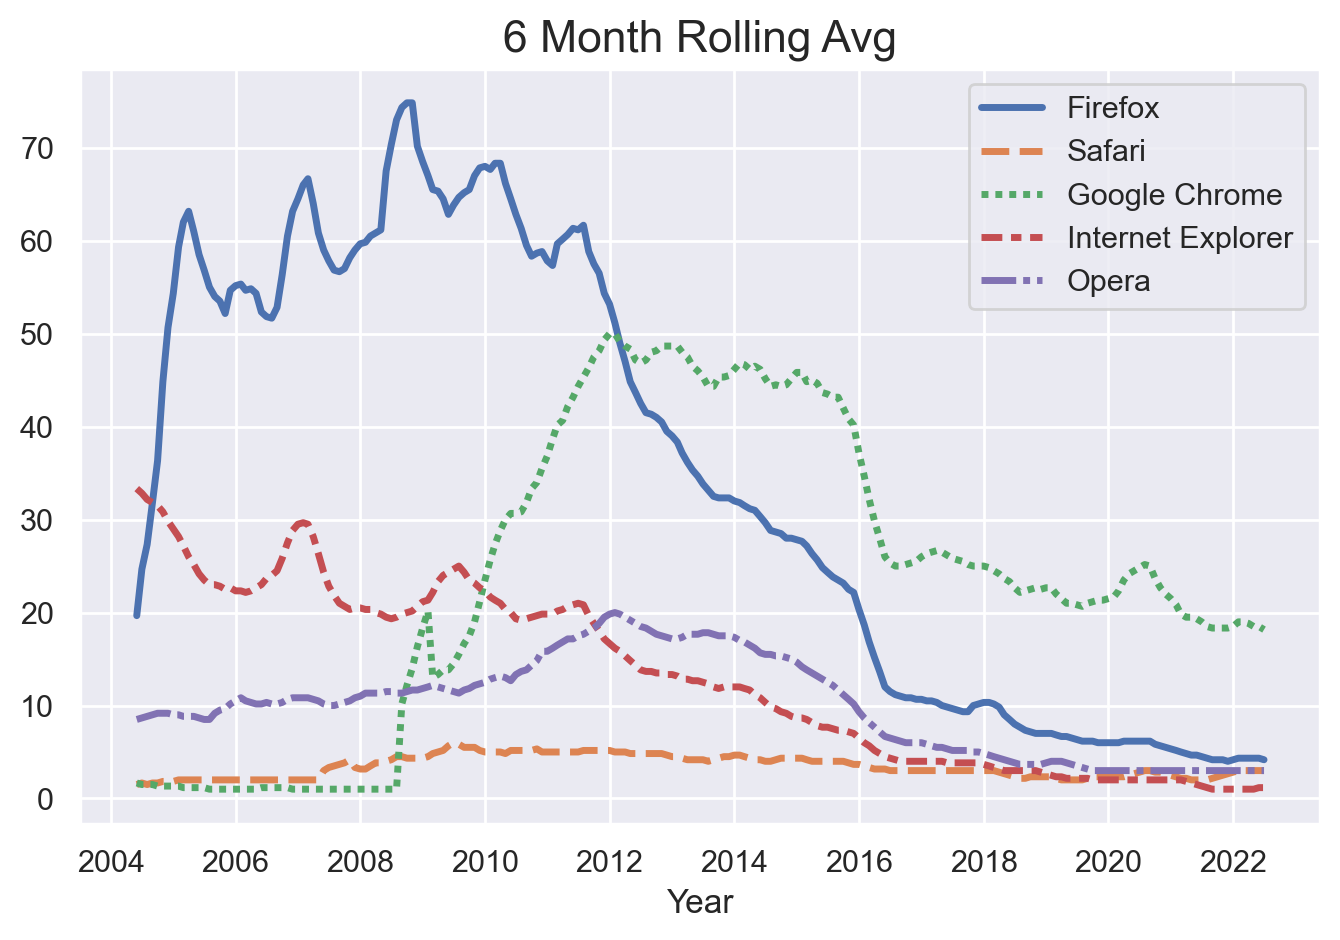

In [164]:
# Find rolling average per every 6 months
rolling_six = df.rolling(6).mean()

# Plot rolling average
plt.figure(figsize=(8,5), dpi=200)
sns.set_style("darkgrid")
ax = sns.lineplot(data=rolling_six)
plt.xlabel("Year")
plt.title("6 Month Rolling Avg", fontsize=16)
plt.show()

### Percentage Change Quarterly

When we have data for two or more points in a time-eries, we can calculate how much change there has been during this period.

<Figure size 1600x1600 with 0 Axes>

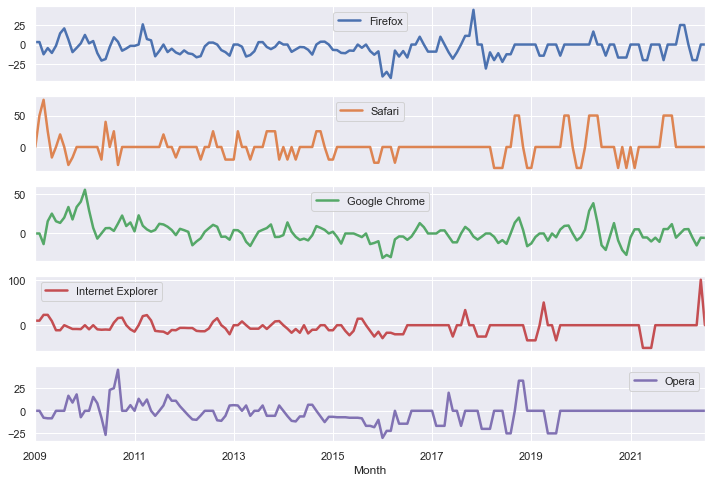

In [172]:
# Find percent changed
pct_change_quarterly = df.pct_change(3)*100

# Since Chrome launched in 2008, only include data >= 2009
pct_change_quarterly = pct_change_quarterly.loc['2009-01':]

# Plot percent changed
plt.figure(figsize=(8,8), dpi=200)
pct_change_quarterly.plot(subplots=True, figsize=(12,8))
plt.show()


### Chrome Trends

Even though Chrome eventually overtook Firefox, Chrome's growth has had its fair share of ups and downs. Let's illustrate this by comparing Chrome's annual Google Trends performance in 2009, 2012, 2015, and 2018.

    2009  2012  2015  2018
0     13    50    46    24
1     12    49    44    25
2     13    46    41    24
3     15    45    46    23
4     15    46    44    22
5     15    47    41    22
6     17    48    45    20
7     18    51    42    22
8     20    51    41    25
9     20    46    39    24
10    24    49    37    23
11    28    47    37    21


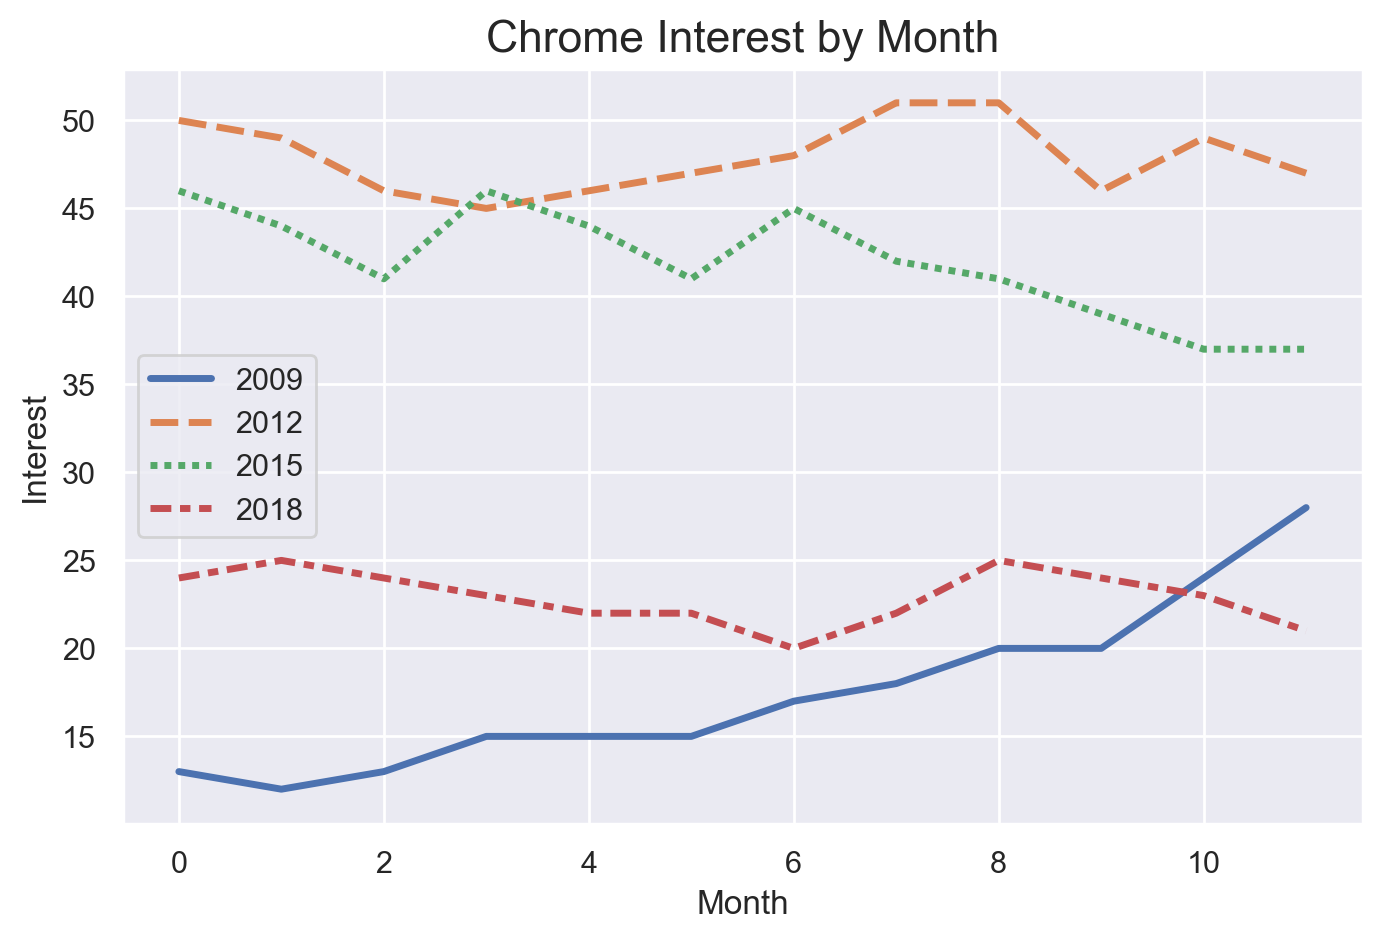

In [166]:
# Get Chrome trends
# for years...
years = ['2009', '2012', '2015', '2018']

# create empty data frame
chrome_trends = pd.DataFrame()

# Concatenate years into chrome_trends
for year in years:
    chrome_trends = pd.concat([chrome_trends, df.loc[year]['Google Chrome'].reset_index(drop=True)], axis=1)

chrome_trends.columns = years

print(chrome_trends)

# Plot trends
plt.figure(figsize=(8,5), dpi=200)
sns.set_style("darkgrid")
ax = sns.lineplot(data=chrome_trends)
plt.ylabel("Interest")
plt.xlabel("Month")
plt.title("Chrome Interest by Month", fontsize=16)
plt.show()